In [2]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 53 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.16 KiB | 2.06 MiB/s, done.
Resolving deltas: 100% (191/191), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.2 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!python -m pip install "dask-ml"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 10.7 MB/s eta 0:00:00


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

In [1]:
import cudf as cd

In [2]:
data1 = cd.read_csv("/content/drive/MyDrive/Malware Datasets/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv", delimiter='|')

In [3]:
data2 = cd.read_csv("/content/drive/MyDrive/Malware Datasets/CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv", delimiter='|')

In [4]:
data3 = cd.read_csv("/content/drive/MyDrive/Malware Datasets/CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv", delimiter='|')

In [5]:

data4 = cd.read_csv("/content/drive/MyDrive/Malware Datasets/CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv", delimiter='|')

In [6]:
data5 = cd.read_csv("/content/drive/MyDrive/Malware Datasets/CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv", delimiter='|')

In [7]:
data6 = cd.read_csv("/content/drive/MyDrive/Malware Datasets/CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv", delimiter='|')

In [8]:
data7 = cd.read_csv("/content/drive/MyDrive/Malware Datasets/CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv", delimiter='|')

In [9]:

data8 = cd.read_csv("/content/drive/MyDrive/Malware Datasets/CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv", delimiter='|')

In [10]:
data9 = cd.read_csv("/content/drive/MyDrive/Malware Datasets/CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv", delimiter='|')

In [11]:
data10 = cd.read_csv("/content/drive/MyDrive/Malware Datasets/CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv", delimiter='|')

In [12]:
data = cd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], ignore_index=True)

In [13]:
data.shape

(25000363, 23)

In [14]:
del data1, data2,data3,data4,data5,data6,data7,data8,data9,data10

In [15]:
colstoreplace = ['uid','id.orig_h','id.resp_h','proto','service','duration','orig_bytes','resp_bytes','conn_state','local_orig','local_resp','history','tunnel_parents','label','detailed-label']

for col in colstoreplace:
  data[col].replace("-",None,inplace=True)

In [16]:
data.isnull().sum() *100/len(data)

ts                  0.000000
uid                 0.000000
id.orig_h           0.000000
id.orig_p           0.000000
id.resp_h           0.000000
id.resp_p           0.000000
proto               0.000000
service            99.928057
duration           61.062341
orig_bytes         61.062341
resp_bytes         61.062341
conn_state          0.000000
local_orig        100.000000
local_resp        100.000000
missed_bytes        0.000000
history             0.100463
orig_pkts           0.000000
orig_ip_bytes       0.000000
resp_pkts           0.000000
resp_ip_bytes       0.000000
tunnel_parents    100.000000
label               0.000000
detailed-label     71.805777
dtype: float64

In [17]:
cols_to_drop = ['service','duration','orig_bytes','resp_bytes','local_orig','local_resp','tunnel_parents','detailed-label','id.orig_h','id.resp_h']
data.drop(columns=cols_to_drop,inplace=True)

In [18]:
data.shape

(25000363, 13)

In [19]:
dat = data.copy()

In [20]:
data.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 13 columns):
 #   Column         Dtype
---  ------         -----
 0   ts             float64
 1   uid            object
 2   id.orig_p      float64
 3   id.resp_p      float64
 4   proto          object
 5   conn_state     object
 6   missed_bytes   float64
 7   history        object
 8   orig_pkts      float64
 9   orig_ip_bytes  float64
 10  resp_pkts      float64
 11  resp_ip_bytes  float64
 12  label          object
dtypes: float64(8), object(5)
memory usage: 2.8+ GB


In [21]:
data.drop(columns = "uid", inplace = True)

In [22]:
dat.drop(columns = "uid", inplace = True)

In [23]:
label_en_cols = ['proto','conn_state','history','label']

In [24]:
for col in label_en_cols:
  dat[col], uniques = dat[col].factorize()

In [25]:
pdf = dat.to_pandas()

In [26]:
cor = pdf.corr()

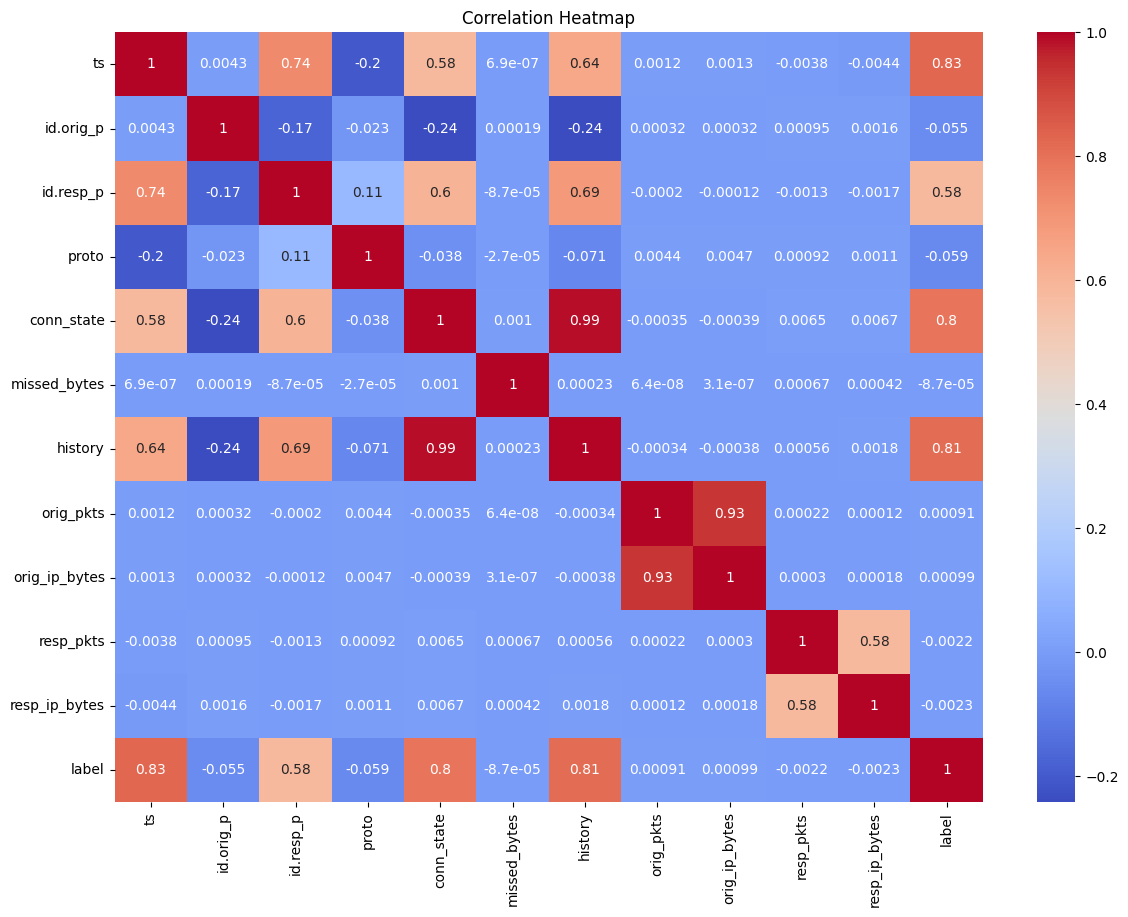

In [29]:
plt.figure(figsize=(14, 10))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
del dat, cor, pdf

In [31]:
colls_to_drop = ['missed_bytes','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes']
data.drop(columns=colls_to_drop,inplace=True)

In [34]:
pdf = data.to_pandas()

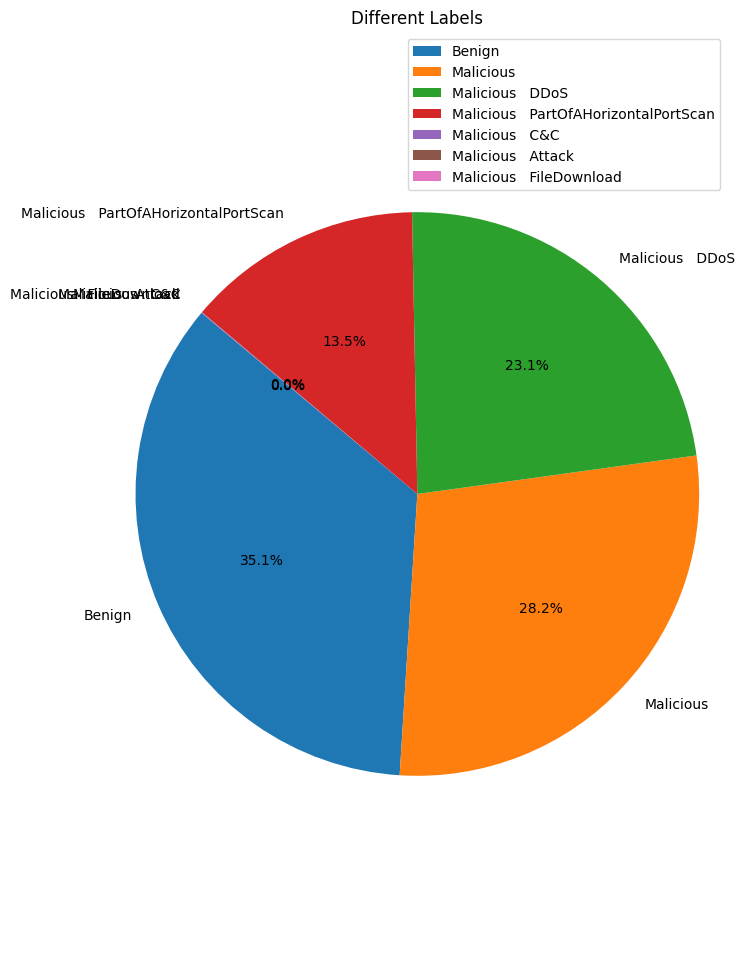

In [35]:
lab_num = pdf['label'].value_counts()
plt.figure(figsize=(8, 12))
plt.pie(lab_num, labels=lab_num.index, autopct='%1.1f%%', startangle=140)
plt.title("Different Labels")
plt.axis('equal')
plt.legend(lab_num.index)
plt.show()

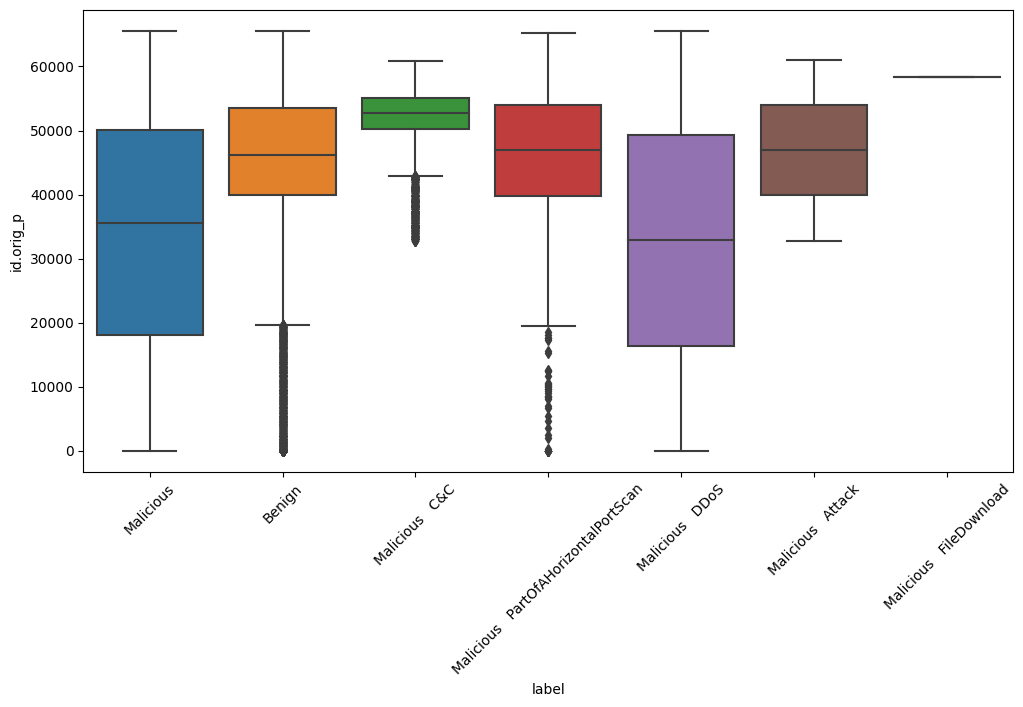

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='id.orig_p', data=pdf)
plt.xticks(rotation=45)
plt.show()

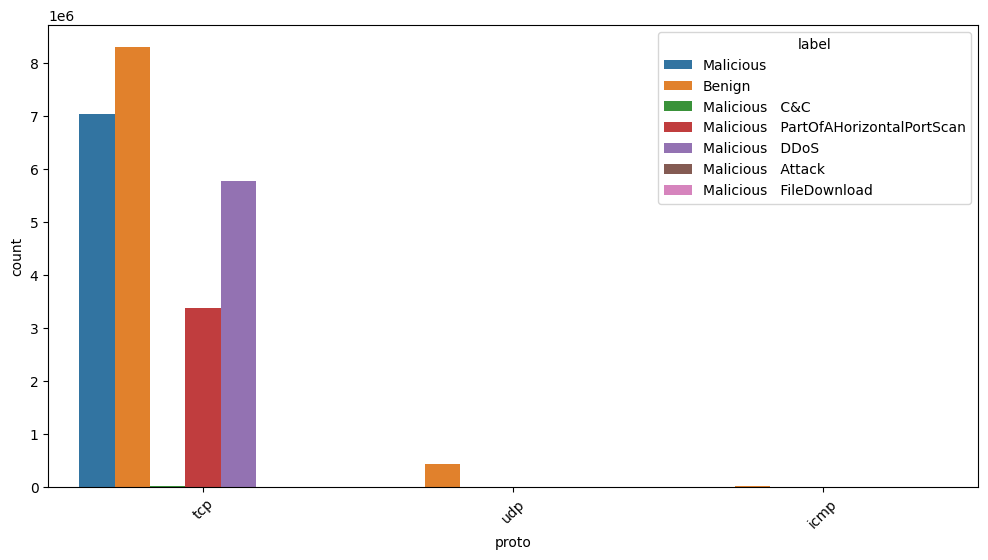

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='proto', hue='label', data=pdf)
plt.xticks(rotation=45)
plt.show()

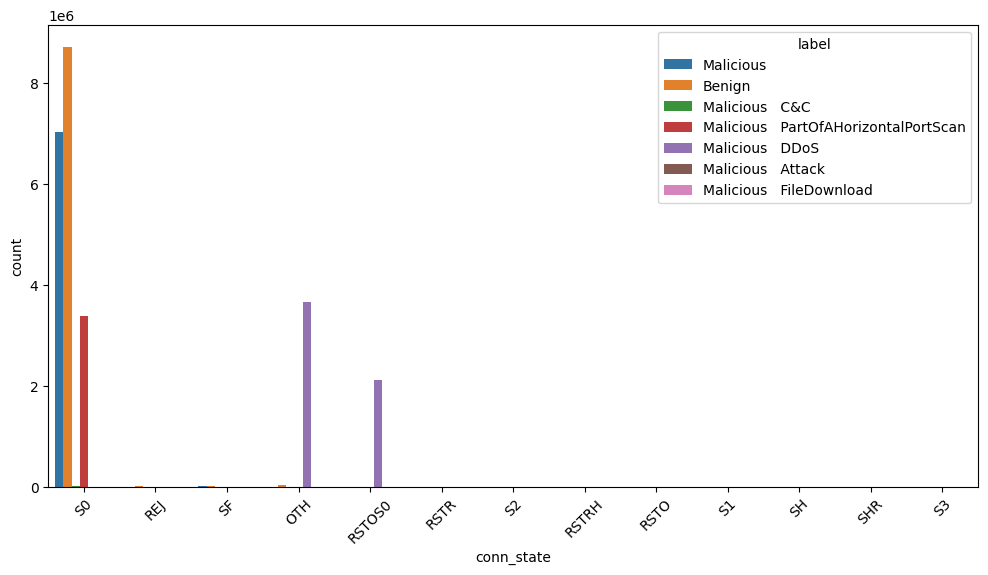

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='conn_state', hue='label', data=pdf)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='label', ylabel='id.orig_p'>

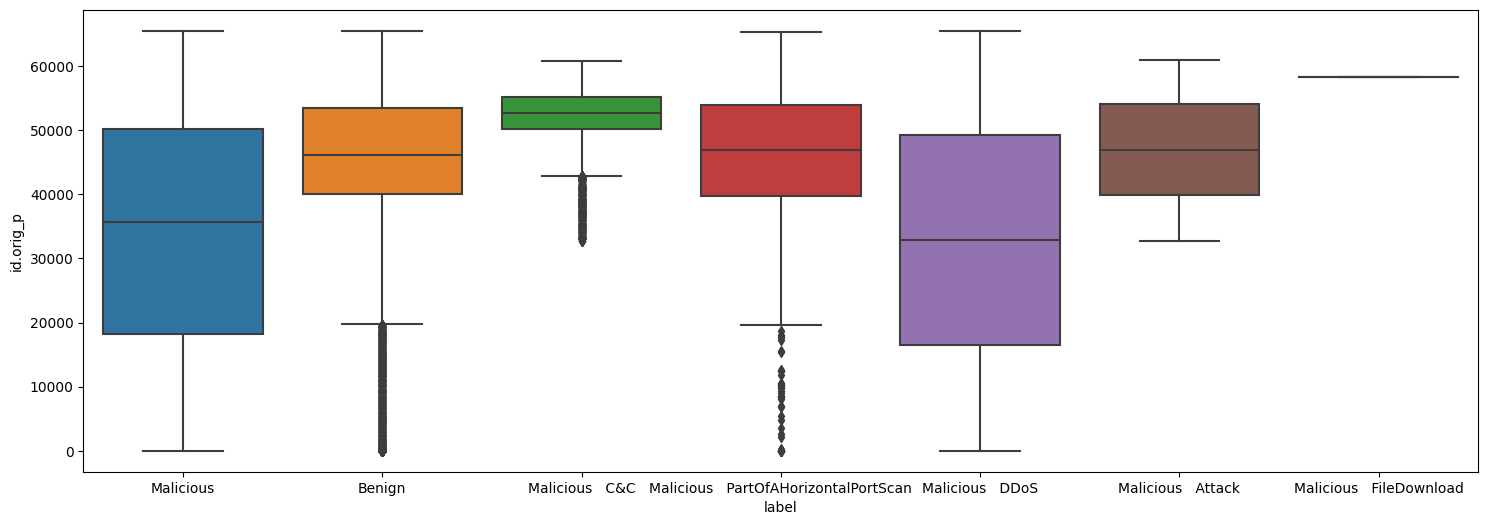

In [39]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='label', y='id.orig_p', data=pdf)

In [40]:
for col in label_en_cols:
  data[col], uniques = data[col].factorize()

In [41]:
data.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 7 columns):
 #   Column      Dtype
---  ------      -----
 0   ts          float64
 1   id.orig_p   float64
 2   id.resp_p   float64
 3   proto       int8
 4   conn_state  int8
 5   history     int16
 6   label       int8
dtypes: float64(3), int16(1), int8(3)
memory usage: 691.4 MB


In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in pdf.columns:
  pdf[col] = label_encoder.fit_transform(pdf[col])
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 7 columns):
 #   Column      Dtype
---  ------      -----
 0   ts          int64
 1   id.orig_p   int64
 2   id.resp_p   int64
 3   proto       int64
 4   conn_state  int64
 5   history     int64
 6   label       int64
dtypes: int64(7)
memory usage: 1.3 GB


In [43]:
datt = data.copy()

In [50]:
iqr_multiplier = 1.5

filtered_df = pdf
for column_name in pdf.columns:
    q1 = pdf[column_name].quantile(0.25)
    q3 = pdf[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    filtered_df = filtered_df[(filtered_df[column_name] >= lower_bound) & (filtered_df[column_name] <= upper_bound)]

In [51]:
filtered_df.shape

(18006305, 7)

In [53]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = filtered_df[['ts', 'id.orig_p', 'id.resp_p', 'proto', 'conn_state', 'history']]
y = filtered_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)

sgd_classifier.fit(X_train, y_train)

predictions = sgd_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.985404001542793
